In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


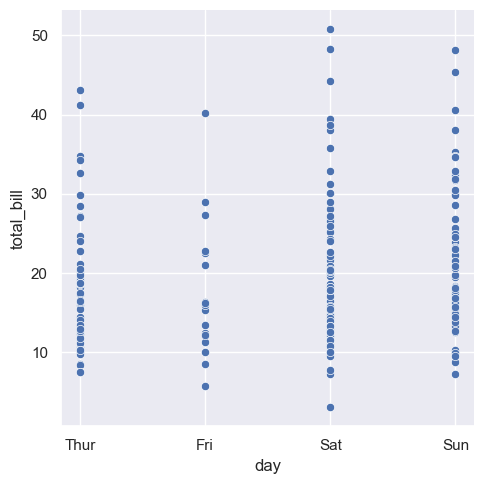

In [6]:
sns.relplot(data=tips, x="day", y="total_bill")

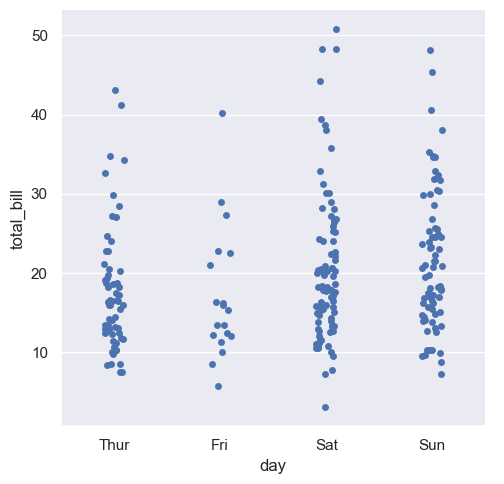

In [7]:
sns.catplot(data=tips, x="day", y="total_bill")

In [8]:
#練習題
#使用下面資料，仿造上圖來繪圖
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


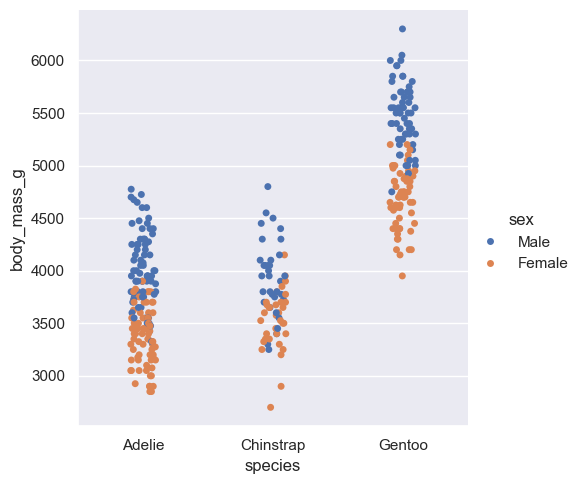

In [16]:
sns.catplot(data=penguins, x="species", y="body_mass_g", hue="sex", jitter=0.1)

<Axes: xlabel='day', ylabel='total_bill'>

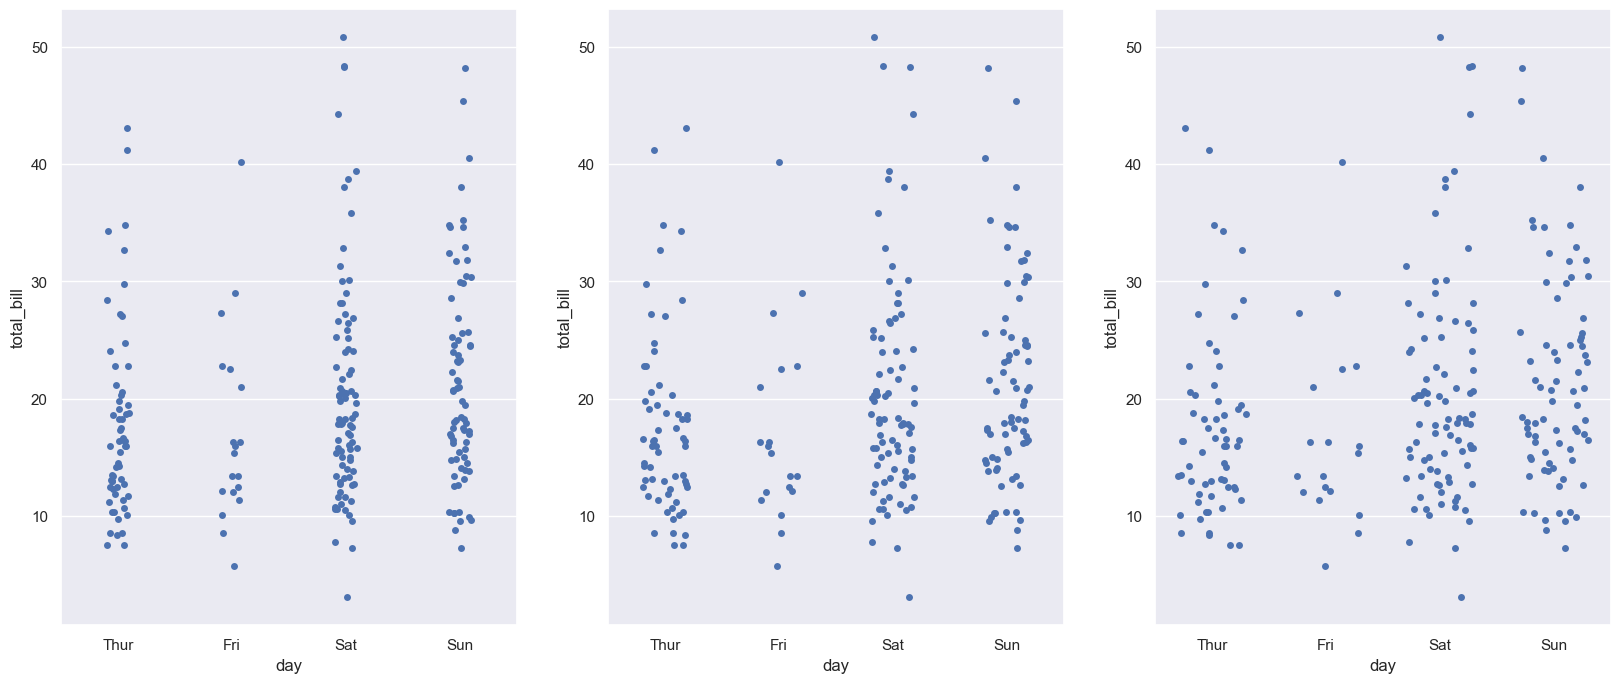

In [17]:
# 比較不同 jitter值的擴散程度
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
#原本的教學範例是用catplot()，但是這裡為了能夠同步比較不同參數的效果區別而採用subplots()，因此必須直接使用stripplot()
sns.stripplot(data=tips, x="day", y="total_bill", jitter=0.1, ax=axes[0])
sns.stripplot(data=tips, x="day", y="total_bill", jitter=0.2, ax=axes[1])
sns.stripplot(data=tips, x="day", y="total_bill", jitter=0.3, ax=axes[2])

第二種方法使用防止點重疊的演算法來調整沿分類軸的點。它可以更好地表示觀測值的分佈，儘管它只適用於相對較小的資料集。這種圖有時被稱為“beeswarm”，在 seaborn 中透過 swarmplot() 繪製，透過在 catplot() 中設定 kind="swarm" 來啟動它：

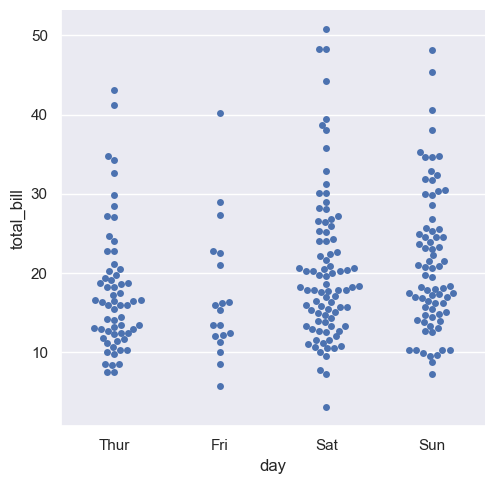

In [ ]:
sns.catplot(data=tips, x="day", y="total_bill", kind="swarm")
plt.show()


In [19]:
#練習題
#使用下面資料，仿造上圖來繪圖
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


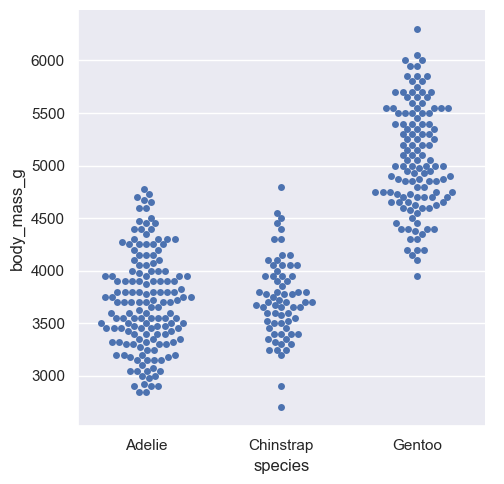

In [20]:
sns.catplot(data=penguins, x="species", y="body_mass_g", kind="swarm")
plt.show()

與數值資料不同，如何沿軸排列分類變數的等級並不總是顯而易見的。一般來說，seaborn 分類繪圖函數會嘗試從資料推斷類別的順序。如果您的資料具有 pandas Categorical 資料類型，則可以在那裡設定類別的預設順序。如果傳遞到分類軸的變數看起來是數字，則層級將被排序。但是，預設情況下，即使使用數字來標記數據，數據仍被視為分類數據並在分類軸上的序數位置（特別是 0、1、...）繪製：

In [32]:
tips.query("size != 3 & sex == 'Female'")
#tips[tips["size"] != 3]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4
14,14.83,3.02,Female,No,Sun,Dinner,2
21,20.29,2.75,Female,No,Sat,Dinner,2
...,...,...,...,...,...,...,...
225,16.27,2.50,Female,Yes,Fri,Lunch,2
226,10.09,2.00,Female,Yes,Fri,Lunch,2
229,22.12,2.88,Female,Yes,Sat,Dinner,2
240,27.18,2.00,Female,Yes,Sat,Dinner,2


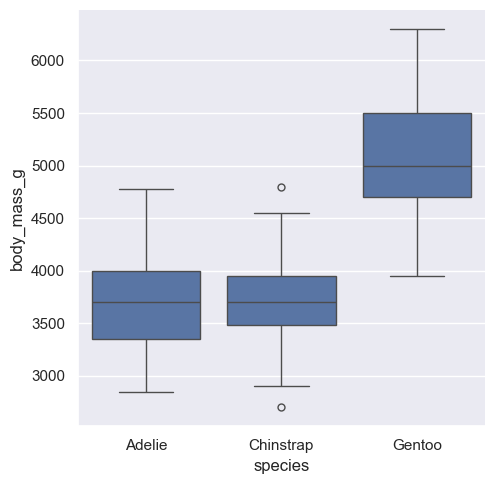

In [31]:
sns.catplot(data=penguins, x="species", y="body_mass_g", kind="box")

In [33]:
diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [34]:
diamonds.shape

(53940, 10)

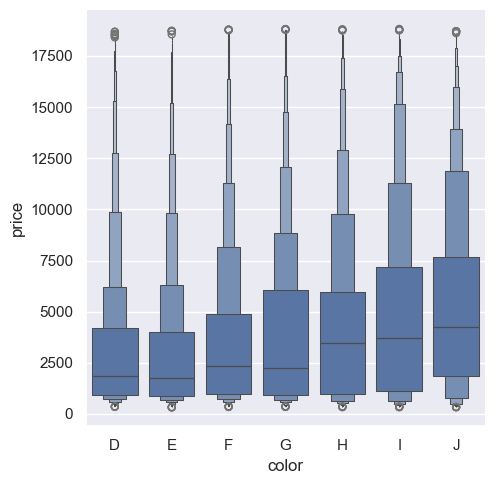

In [35]:
sns.catplot(
    data=diamonds.sort_values("color"),
    x="color", y="price", kind="boxen",
)

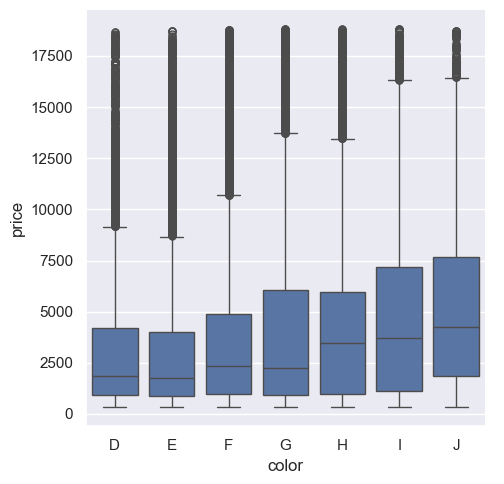

In [36]:
sns.catplot(
    data=diamonds.sort_values("color"),
    x="color", y="price", kind="box",
)

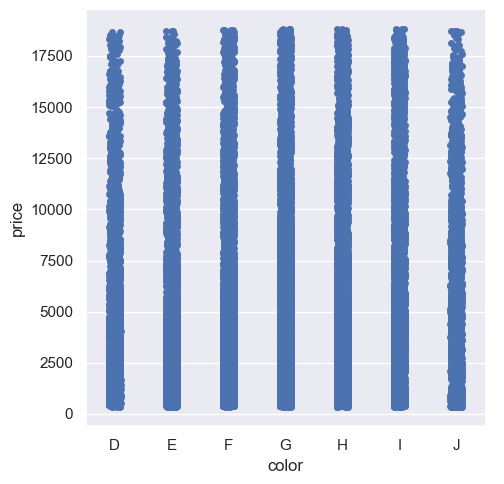

In [37]:
# 如果不使用boxenplot(),則資料點會因為數目過多而混在一起無法辨識
sns.catplot(
    data=diamonds.sort_values("color"),
    x="color", y="price"
)

# Violinplots
另一種方法是 violinplot()，它將箱線圖(boxplot)與分佈教程中描述的核密度估計(kernel density estimation, KDE)過程結合：

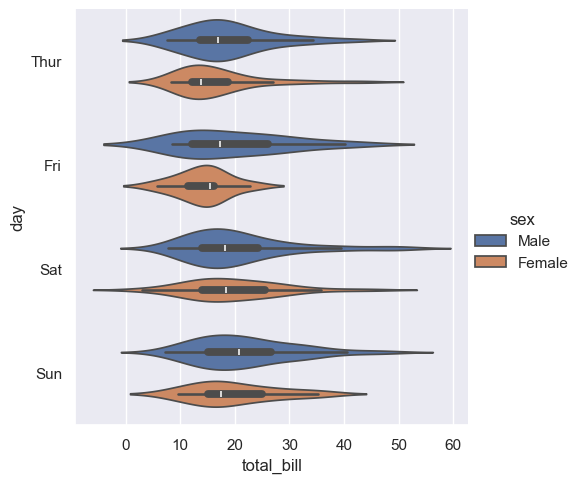

In [38]:
sns.catplot(
    data=tips, x="total_bill", y="day", hue="sex", kind="violin",
)

In [39]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


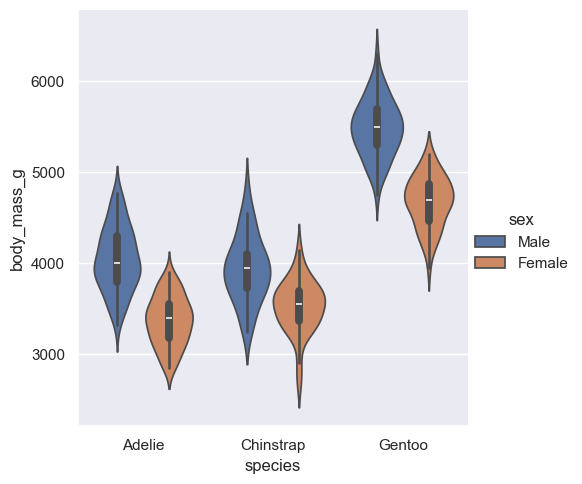

In [40]:
sns.catplot(
    data=penguins, x="species", y="body_mass_g", hue="sex", kind="violin",
)

該方法使用核密度估計來提供對值分佈的更豐富的描述。此外，箱線圖中的四分位數和晶須值顯示在小提琴內部。缺點是，由於小提琴圖使用 KDE，因此可能需要調整一些其他參數，相對於簡單的箱型圖增加了一些複雜性：

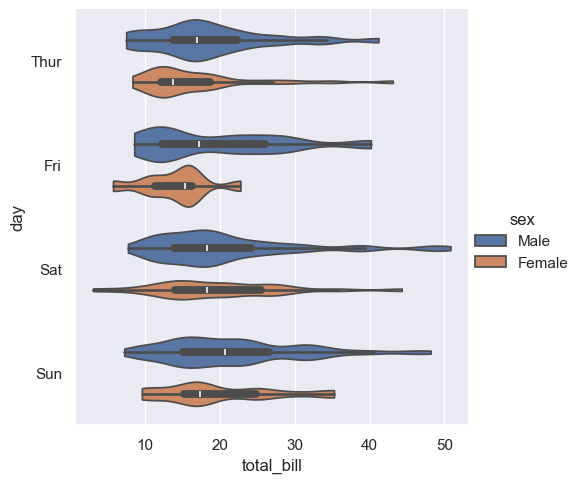

In [41]:
sns.catplot(
    data=tips, x="total_bill", y="day", hue="sex",
    kind="violin", bw_adjust=.5, cut=0,
)

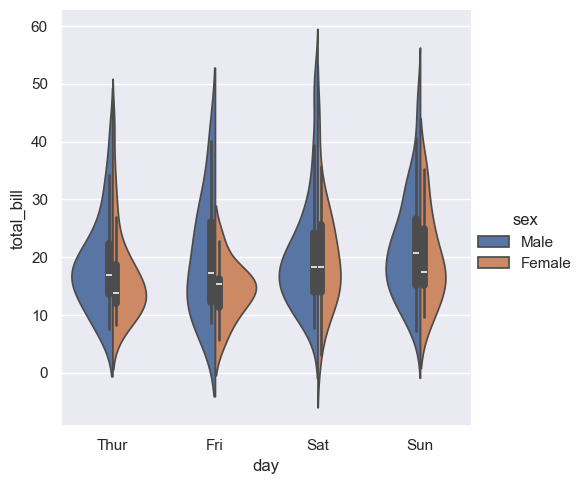

In [44]:
sns.catplot(
    data=tips, x="day", y="total_bill", hue="sex",
    kind="violin", split=True,
)

In [45]:
#練習題
#使用下面資料，仿造上圖來繪圖
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


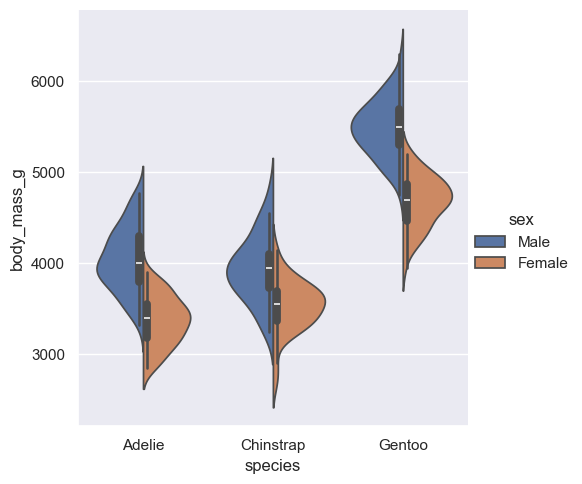

In [46]:
sns.catplot(
    data=penguins, x="species", y="body_mass_g", hue="sex",
    kind="violin", split=True,
)